# ESCUELA POLITECNICA NACIONAL
- Nombre: Freddy Jimenez
- Curso: Gr1cc
- Fecha: 06/02/20025

[02-06 13:11:10][INFO] 2025-02-06 13:11:10.030790
[02-06 13:11:10][INFO] fredd| 2025-02-06 13:11:10.032792
[02-06 13:11:10][INFO] 2025-02-06 13:11:10.034783
[02-06 13:11:10][INFO] fredd| 2025-02-06 13:11:10.036623
[02-06 13:11:10][INFO] Se ajustarán 3 parámetros.
[02-06 13:11:10][INFO] 
[[ 214.18604567   61.6479       20.           24.7861    ]
 [   0.          -17.57011186  -13.53914045    9.4986119 ]
 [   0.         -112.51779515  -83.54300563   78.89917291]]
[02-06 13:11:10][INFO] 
[[214.18604567  61.6479      20.          24.7861    ]
 [  0.         -17.57011186 -13.53914045   9.4986119 ]
 [  0.           0.           3.16072415  18.07071169]]


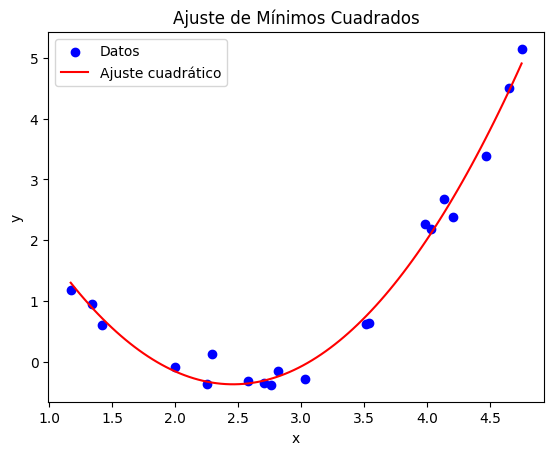

El error relativo cuadrático es 0.3786671209558097
[02-06 13:11:10][INFO] Se ajustarán 2 parámetros.
[02-06 13:11:10][INFO] 
[[61.6479     20.         24.7861    ]
 [ 0.         -7.83899109 16.56283549]]


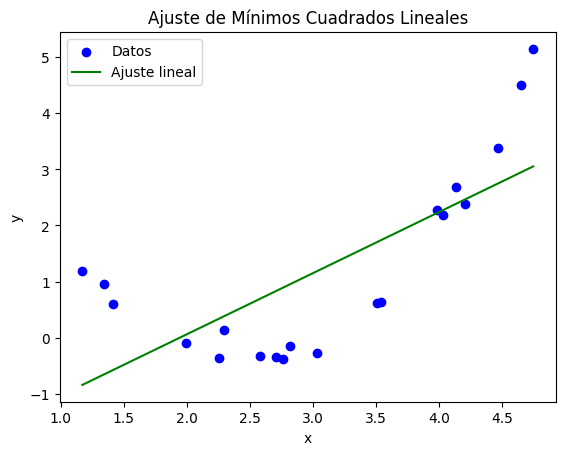

El error relativo lineal es 1.8948678846046576


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src import ajustar_min_cuadrados

# Derivadas parciales para el sistema de ecuaciones cuadrático
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(yi * xi for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

# Función cuadrática ajustada
def funcion_cuadratica(x: float, pars: tuple[float, float, float]) -> float: 
    a2, a1, a0 = pars
    return a2*x**2 + a1*x + a0

# Datos xs e ys
xs = [
    1.1715, 1.3396, 1.4163, 1.9962, 2.2523, 2.2947, 2.5793, 2.7054, 2.7635,
    2.8200, 3.0317, 3.5111, 3.5393, 3.9829, 4.0323, 4.1353, 4.2084, 4.4683,
    4.6509, 4.7489
]

ys = [
    1.1902, 0.9564, 0.6078, -0.0856, -0.3550, 0.1355, -0.3171, -0.3425, -0.3758,
    -0.1518, -0.2767, 0.6251, 0.6447, 2.2733, 2.1789, 2.6781, 2.3818, 3.3786,
    4.4971, 5.1431
]

# Ajuste cuadrático
pars1 = ajustar_min_cuadrados(xs, ys, gradiente = [der_parcial_2, der_parcial_1, der_parcial_0])

# Crear el rango de valores de x para graficar la función ajustada
x = np.linspace(min(xs), max(xs), 100)
y = [funcion_cuadratica(xi, pars1) for xi in x]

# Graficar los resultados
plt.scatter(xs, ys, label="Datos", color="blue")
plt.plot(x, y, color="red", label="Ajuste cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de Mínimos Cuadrados")
plt.legend()
plt.show()

# Cálculo del error cuadrático relativo
error_relativo = np.mean([abs(y_real - funcion_cuadratica(x_real, pars1))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo cuadrático es {error_relativo}")

# Derivadas parciales para el sistema de ecuaciones lineales
def der_parcial_lin_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

def der_parcial_lin_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)

# Función lineal ajustada
def funcion_lineal(x: float, pars: tuple[float, float]) -> float:
    a1, a0 = pars
    return a1*x + a0

# Ajuste lineal
pars2 = ajustar_min_cuadrados(xs, ys, gradiente = [der_parcial_lin_0, der_parcial_lin_1])

# Graficar el ajuste lineal
y_lineal = [funcion_lineal(xi, pars2) for xi in x]

plt.scatter(xs, ys, label="Datos", color="blue")
plt.plot(x, y_lineal, color="green", label="Ajuste lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de Mínimos Cuadrados Lineales")
plt.legend()
plt.show()

# Cálculo del error relativo lineal
error_relativo_lineal = np.mean([abs(y_real - funcion_lineal(x_real, pars2))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo lineal es {error_relativo_lineal}")